In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [111]:
df = pd.read_csv('weight-height.csv')

In [112]:
df.sample(5)

,Gender,Height,Weight
3934,Male,67.227445,182.546138
3515,Male,67.071263,177.335255
1151,Male,73.759550,217.219801
3904,Male,69.067682,194.822087
1959,Male,73.491205,218.673756


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


<Axes: xlabel='Height', ylabel='Count'>

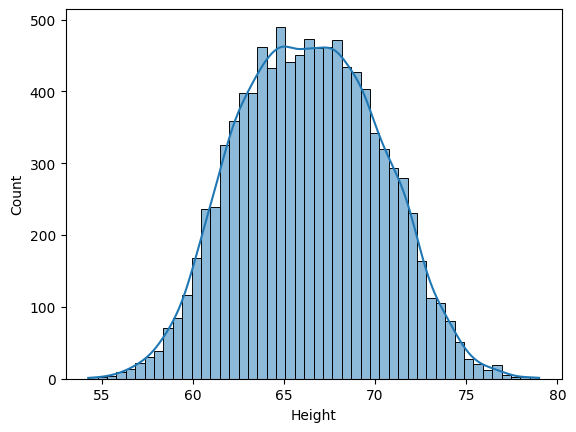

In [114]:
sns.histplot(df['Height'], kde=True)

In [115]:
df['Height'].skew()

np.float64(0.04936908937689031)

In [116]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height'>

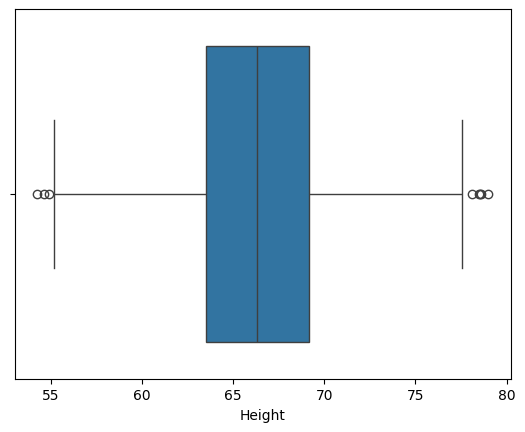

In [117]:
sns.boxplot(x='Height', data=df)

In [118]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<Axes: xlabel='Weight'>

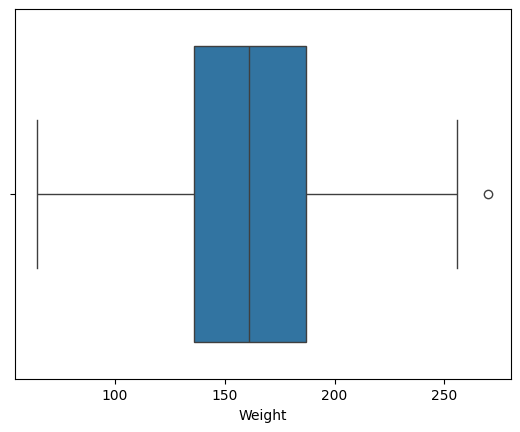

In [119]:
sns.boxplot(x='Weight', data=df)

In [120]:
# finding outliers

upper_limit = df['Height'].quantile(0.98)
lower_limit = df['Height'].quantile(0.02)

In [121]:
lower_limit

np.float64(58.95993803762639)

In [122]:
mask = (df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)

df[mask]

,Gender,Height,Weight
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
31,Male,74.033808,212.910225
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
...,...,...,...
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151
9922,Female,58.752489,106.846041


# Trimming

In [123]:
mask = (df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)

new_df = df[mask]

In [124]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [125]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [92]:
tnf = ColumnTransformer([
    ('trf1', StandardScaler(), ['Height', 'Weight'])
])

In [93]:
trfd_xtrain = tnf.fit_transform(x_train)
trfd_xtest = tnf.transform(x_test)

In [94]:
tnf = LabelEncoder()

In [95]:
trfd_ytrain = tnf.fit_transform(y_train)
trfd_ytest = tnf.transform(y_test)

In [96]:
# predicting the vals

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trfd_xtrain, trfd_ytrain)
clf2.fit(trfd_xtrain, trfd_ytrain)

pred = clf.predict(trfd_xtest)
pred2 = clf2.predict(trfd_xtest)

print(accuracy_score(pred, trfd_ytest))
print(accuracy_score(pred2, trfd_ytest))

0.916
0.8806666666666667


In [97]:
print(np.mean(cross_val_score(estimator=clf, X=trfd_xtrain, y=trfd_ytrain, cv=10)))
print(np.mean(cross_val_score(estimator=clf2, X=trfd_xtrain, y=trfd_ytrain, cv=10)))

0.9198823529411764
0.873764705882353


# Capping

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [143]:
condition = x_train['Height'] >= upper_limit
condition1 = x_train['Height'] <= lower_limit

height_col_train = np.where(condition, 
        upper_limit,
        np.where(
          condition1,
            lower_limit,
        x_train['Height']))

In [144]:
condition = x_test['Height'] >= upper_limit
condition1 = x_test['Height'] <= lower_limit

height_col_test = np.where(condition, 
        upper_limit,
        np.where(
          condition1,
            lower_limit,
        x_test['Height']))

In [145]:
x_train['Height'] = height_col_train

In [146]:
x_test['Height'] = height_col_test

In [148]:
tnf = ColumnTransformer([
    ('trf1', StandardScaler(), ['Height', 'Weight'])
])

In [149]:
tnf2 = LabelEncoder()

In [150]:
trfd_xtrain = tnf.fit_transform(x_train)
trfd_xtest = tnf.transform(x_test)

In [151]:
trfd_ytrain = tnf2.fit_transform(y_train)
trfd_ytest = tnf2.transform(y_test)


In [152]:
# predicting the vals

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trfd_xtrain, trfd_ytrain)
clf2.fit(trfd_xtrain, trfd_ytrain)

pred = clf.predict(trfd_xtest)
pred2 = clf2.predict(trfd_xtest)

print(accuracy_score(pred, trfd_ytest))
print(accuracy_score(pred2, trfd_ytest))

0.916
0.8733333333333333


In [153]:
print(np.mean(cross_val_score(estimator=clf, X=trfd_xtrain, y=trfd_ytrain, cv=10)))
print(np.mean(cross_val_score(estimator=clf2, X=trfd_xtrain, y=trfd_ytrain, cv=10)))

0.9198823529411764
0.8724705882352941
